In [1]:
pip install python-geoip-geolite2

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import urllib.request
import json
import os
import anonypy
import statistics as st

In [4]:
df = pd.read_csv("depersonalize.csv", sep=",", index_col=False)
df

,Дата просмотра,Кол-во рекламы,Вид рекламы,Количество повторений
0,7,41,Чемодан,13
1,7,58,Ролик,13
2,7,26,Газонокосилки Champion,13
3,8,31,Сериал,8
4,8,75,Туристические рюкзак,6
...,...,...,...,...
25659,6,51,Вентиляторы Equation,6
25660,7,83,Микроволновые печи Midea,6
25661,7,7,Холодильники Samsung,5
25662,8,102,Ноутбуки Huawei,5


In [9]:
df.min(axis=)

Дата просмотра                            6
Кол-во рекламы                           -3
Вид рекламы              Велосипеды Forward
Количество повторений                     5
dtype: object

In [2]:
df = pd.read_csv("advertisement.csv", sep=",", index_col=False)
df.head(10)

,Пользователь,IP адрес,Платформы,Дата просмотра,Кол-во рекламы,Время просмотра рекламы,Вид рекламы
0,juli24@yandex.ru,11.229.14.214,vk.com,2022-08-02,17,697,Парфюмерия Fragrance World
1,silantinovikov@gmail.com,151.40.23.163,ok.ru,2022-08-06,79,8216,Смартфоны One Plus
2,jpoljakova@yandex.ru,45.48.47.93,ok.ru,2022-08-25,87,7569,Газонокосилки Huter
3,stanimir2013@hotmail.com,164.64.4.212,ivi.ru,2022-06-30,22,2596,Планшеты Huawei
4,belozerovaksenija@mail.ru,178.150.235.22,wink.ru,2022-06-18,94,5076,Гироскутеры GT
5,izot_38@yahoo.com,207.176.229.214,kion.ru,2022-08-23,24,2784,Смартфоны Huawei
6,valerjan_1980@yahoo.com,65.110.78.38,rutube.ru,2022-06-07,19,2242,Умные часы и браслеты Xiaomi
7,mamontovmaksimiljan@yandex.ru,205.105.177.220,megogo.net,2022-06-17,50,5500,Газонокосилки Ресанта
8,gorbunovadarja@gmail.com,204.26.197.173,kion.ru,2022-07-14,34,1836,Велосипеды Forward
9,galina_79@yandex.ru,203.242.8.216,wink.ru,2022-07-12,19,1235,Газонокосилки Ресанта


In [7]:
",".join(df.columns.to_list())+"\n"

'Пользователь,IP адрес,Платформы,Дата просмотра,Кол-во рекламы,Время просмотра рекламы,Вид рекламы\n'

In [4]:
def ipToCountry(ip): 
    try:
        url = "https://ipinfo.io/" + ip + "/json"
        load = urllib.request.urlopen(url)
        top = json.load(load)
        return top["country"]
    except:
        return "World"
def hideip(ip):
    return ip[:ip.index('.')]+".***.***.***"
def dateToInt(date):
    return int(date[5:7])
def advbool(adv):
    if adv>=50:
        return ">=50"
    else:
        return "<50"
def timetothousand(time):
    if time>=5000:
        return ">=5000"
    elif time >=1000:
        return "1000<=>5000"
    else:
        return "<1000"
def typeadv(adv):
    if " " in adv:
        return adv[:adv.index(" ")]
    else:
        return adv
def domen(x):
    return x[x.index(".")+1:]

US
8


In [5]:
#df["IP адрес"]=df["IP адрес"].apply(hideip)
df["Дата просмотра"]=df["Дата просмотра"].apply(dateToInt)
df["Кол-во рекламы"]=df["Кол-во рекламы"].apply(advbool)
#df["Время просмотра рекламы"]=df["Время просмотра рекламы"].apply(timetothousand)
df["Вид рекламы"]=df["Вид рекламы"].apply(typeadv)
df = df.drop(['Пользователь'], axis = 1)
df = df.drop(["IP адрес"], axis = 1)
df = df.drop(["Время просмотра рекламы"], axis = 1)
df["Платформы"] = df["Платформы"].apply(domen)
#df = df.drop(["Кол-во рекламы"], axis =1)

In [6]:
df

,Платформы,Дата просмотра,Кол-во рекламы,Вид рекламы
0,com,8,<50,Парфюмерия
1,ru,8,>=50,Смартфоны
2,ru,8,>=50,Газонокосилки
3,ru,6,<50,Планшеты
4,ru,6,>=50,Гироскутеры
...,...,...,...,...
249995,com,6,<50,Холодильники
249996,org,6,<50,Вентиляторы
249997,com,6,<50,Сериал
249998,com,6,<50,Холодильники


In [7]:
d = dict()
for i in range(df.shape[0]):
    if ",".join(map(str, list(df.iloc[i]))) in d:
        d[",".join(map(str, list(df.iloc[i])))]+=1
    else:
        d[",".join(map(str, list(df.iloc[i])))]=1
print(list(d.values()).count(1))
print(list(d.values()).count(2))
print(list(d.values()).count(3))
print(list(d.values()).count(4))
print(list(d.values()).count(5))
print(list(d.values()).count(6))
print(list(d.values()).count(7))
print(list(d.values()).count(8))
print(list(d.values()).count(9))

        
#columns =["IP адрес","Платформы","Дата просмотра","Кол-во рекламы","Время просмотра рекламы","Вид рекламы","count"]


2
12
25
34
54
58
92
82
49


In [10]:
x = range(1,301)
def f(x):
    return list(d.values()).count(x)
y = [f(i) for i in x]


In [11]:
import matplotlib.pyplot as plt

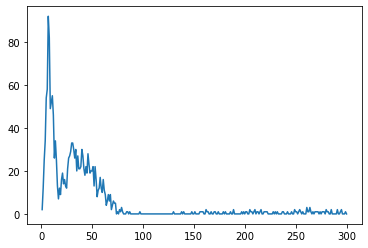

In [12]:
x = range(1,301)
def f(x):
    return list(d.values()).count(x)
y = [f(i) for i in x]
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [13]:
import codecs
dep_df = 'Платформы,Дата просмотра,Кол-во рекламы,Вид рекламы,Количество повторений\n'
for key in d:
    if d[key]>=5:
        dep_df+=key+","+str(d[key])+"\n"
f = codecs.open("depersonalize.csv","w",encoding='utf-8')
f.write(dep_df)
f.close()